# Weak Kidney - Gaussian NB

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Weak/Failing kidneys data

weak_kidney_df = ml.get_data_of_disease(driver, 'Weak/Failing kidneys')
weak_kidney_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Weak/Failing kidneys
0,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
1,93708,0,66,23.7,116.0,1.218750,0.192,0.127,NaN,0.7,...,109.00,22.0,13.2,58.32,2.870,247.0,32.0,30.1,0.655,0
2,93709,0,75,38.9,72.8,1.121212,0.009,0.017,28.561,0.6,...,129.00,31.0,15.4,NaN,NaN,NaN,21.0,46.5,NaN,0
3,93711,1,56,21.3,165.0,1.290323,0.173,0.079,31.115,0.4,...,40.60,19.0,14.7,31.68,4.086,139.0,16.0,34.8,0.542,0
4,93713,1,67,23.5,63.5,2.047619,0.028,0.028,18.344,0.6,...,238.00,26.0,14.2,NaN,NaN,123.0,27.0,28.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,102950,1,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5556,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
5557,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
5558,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0


### Training

In [4]:
gaussian_nb = ml.GaussianNB()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

gaussian_nb.fit(X_train, y_train)

# Accuracy scores

y_pred = gaussian_nb.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, gaussian_nb.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.8851169064748201
Testing Accuracy:  0.8857913669064749


## Feature Selection

### Correlation Analysis

In [5]:
gaussian_nb_test = ml.GaussianNB()

In [6]:
pos_corr, neg_corr = ml.get_correlated_features(weak_kidney_df,'Weak/Failing kidneys',pos=0.0,neg=-0.0)

corr_features = list(pos_corr.keys()[1:]) + list(neg_corr.keys())
corr_features[:30]

['Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Osmolality [mmol/Kg]',
 'Age',
 'Ferritin [ng/mL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Chromium [nmol/L]',
 'Insulin [pmol/L]',
 'Potassium [mmol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Monocyte [%]',
 'Segmented neutrophils [%]',
 'BMI',
 'Platelet_Lymphocyte Ratio',
 'Eosinophils [%]',
 'Globulin [g/dL]',
 'Mean cell volume [fL]',
 'Transferrin receptor [nmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Basophils [%]',
 'Gamma Glutamyl Transferase [IU/L]']

In [7]:
ml.evaluate_feature_set(corr_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.913

Test Accuracy: 0.916

Precision: 0.243

Recall: 0.489

F1-Score: 0.325


### SelectFromModel

In [8]:
sfm_features = ml.select_from_model_features(ml.LogisticRegression(),X,y)
sfm_features

['Gender',
 'Age',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio',
 'Beta-cryptoxanthin [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Creatinine [mg/dL]',
 'Glycohemoglobin [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'LDL_HDL Ratio',
 'Lutein and zeaxanthin [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Phosphorus [mg/dL]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Triglyceride_HDL Ratio',
 'Alanine Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Transferrin Saturation [%]',
 'Triglyceride [mmol/L]']

In [9]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.913

Test Accuracy: 0.919

Precision: 0.258

Recall: 0.511

F1-Score: 0.343


### SelectKBest

In [10]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Age',
 'Osmolality [mmol/Kg]',
 'Ferritin [ng/mL]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Hematocrit [%]',
 'Hemoglobin [g/dL]',
 'Albumin [g/dL]',
 'Lymphocyte [%]',
 'Potassium [mmol/L]',
 'Chromium [nmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'A/G Ratio',
 'Glycohemoglobin [%]',
 'Total Lycopene [umol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Trans-lycopene [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Insulin [pmol/L]',
 'Alpha-crypotoxanthin [umol/L]',
 'Monocyte [%]']

In [11]:
ml.evaluate_feature_set(k_best_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.914

Test Accuracy: 0.917

Precision: 0.260

Recall: 0.543

F1-Score: 0.352


### Recursive Feature Elimination (RFE) 

In [12]:
rfe_features = ml.select_rfe_features(ml.LogisticRegression(),X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'LDL_HDL Ratio',
 'Lutein and zeaxanthin [umol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Glycohemoglobin [%]',
 'Platelet_WBC Ratio',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Hemoglobin [g/dL]',
 'Transferrin Saturation [%]',
 'RBC count [million cells/uL]',
 'Globulin [g/dL]',
 'Phosphorus [mg/dL]',
 'Age',
 'Beta-cryptoxanthin [umol/L]',
 'Creatinine [mg/dL]',
 'BMI',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio']

In [13]:
ml.evaluate_feature_set(rfe_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.917

Test Accuracy: 0.920

Precision: 0.249

Recall: 0.467

F1-Score: 0.325


### Lasso Regularization

In [14]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Creatinine [mg/dL]',
 'Gender',
 'Age',
 'LDL_HDL Ratio',
 'Retinol [umol/L]',
 'Platelet_Lymphocyte Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Ferritin [ng/mL]',
 'Phosphorus [mg/dL]',
 'Aspartate Aminotransferase [U/L]',
 'Vitamin C [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Alkaline Phosphatase [IU/L]',
 'Lutein and zeaxanthin [umol/L]',
 'Total Bilirubin [mg/dL]',
 'Bicarbonate [mmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Blood lead [umol/L]',
 'Total Lycopene [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'A/G Ratio',
 'Blood selenium [umol/L]',
 'Uric Acid [mg/dL]',
 'Transferrin receptor [nmol/L]',
 'Platelet_WBC Ratio',
 'Iron frozen [umol/L]',
 'White blood cell count [1000 cells/uL]',
 'Nucleated RBCs',
 'Iron [ug/dL]']

In [15]:
ml.evaluate_feature_set(l1_selected_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.930

Test Accuracy: 0.935

Precision: 0.314

Recall: 0.478

F1-Score: 0.379


### Relief F

In [16]:
relieff_features = ml.relief_feature_select(30,X,y)

In [17]:
relieff_features[:30]

['Nucleated RBCs',
 'Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 'Non_HDL Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Lymphocyte [%]',
 'Albumin [g/dL]',
 'Gender',
 'Transferrin Saturation [%]',
 'Chloride [mmol/L]',
 'UIBC [umol/L]',
 'Glycohemoglobin [%]',
 'Red cell distribution width [%]',
 'Globulin [g/dL]',
 'Total Protein [g/dL]',
 'A/G Ratio',
 'Segmented neutrophils [%]',
 'Total Lycopene [umol/L]',
 'Alpha-tocopherol [umol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Iron frozen [umol/L]']

In [18]:
ml.evaluate_feature_set(relieff_features[:30], gaussian_nb_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.917

Test Accuracy: 0.923

Precision: 0.280

Recall: 0.554

F1-Score: 0.372


### Optimal no. of features

In [19]:
final_features = l1_selected_features

Finding optimal no. of features..: 100%|████████| 85/85 [00:03<00:00, 22.09it/s]



Maximum accuracy = 0.9586 for 5 features


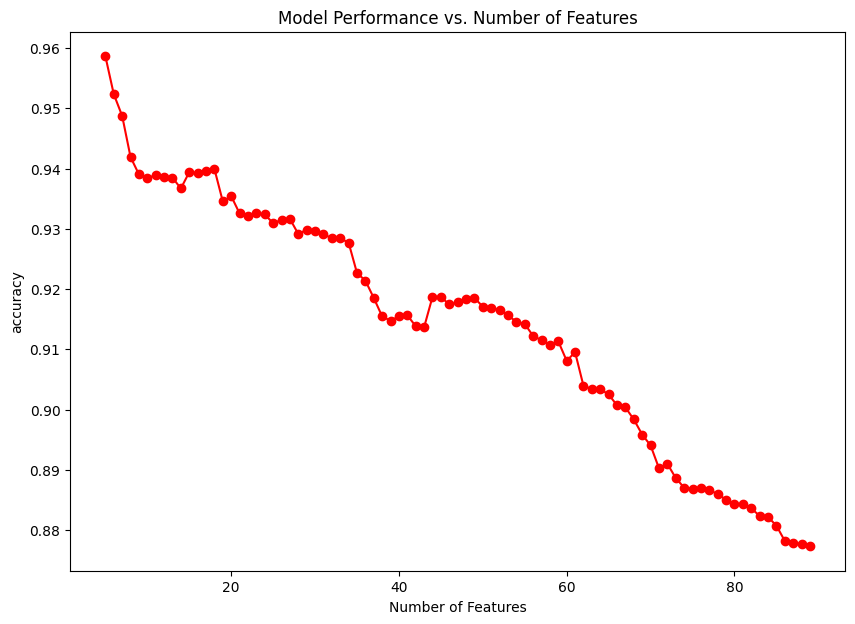

In [20]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 85/85 [00:04<00:00, 18.09it/s]



Maximum f1 = 0.3802 for 5 features


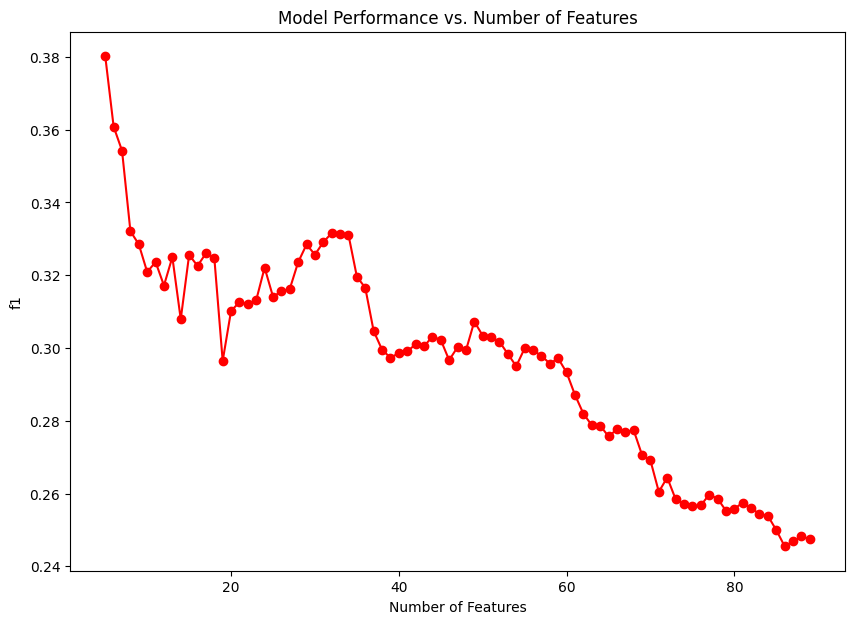

In [21]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='f1')

Finding optimal no. of features..: 100%|████████| 85/85 [00:04<00:00, 19.61it/s]



Maximum precision = 0.4926 for 5 features


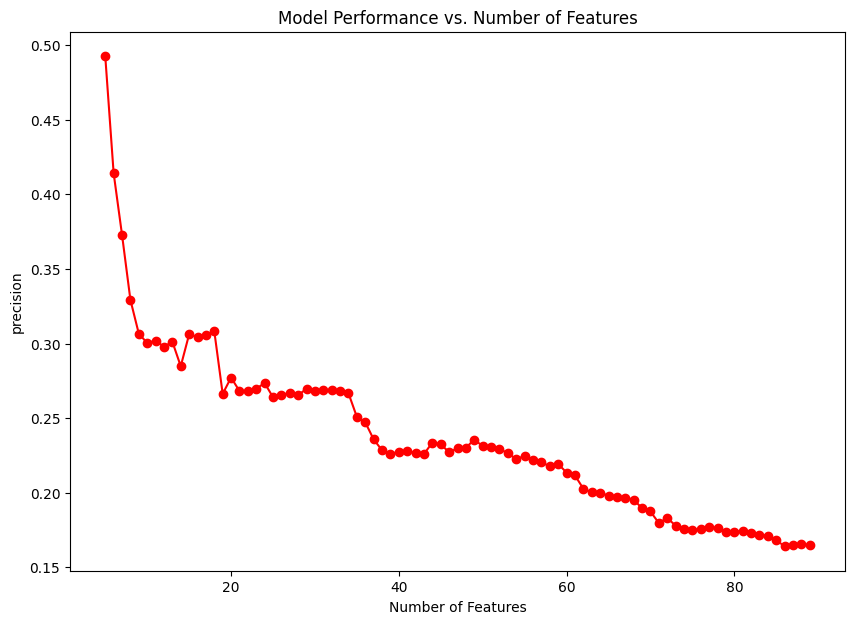

In [23]:
# Optimal no. of features

ml.plot_num_feature_performance(gaussian_nb_test,  X, y, final_features, scoring='precision')

In [24]:
num_features = 5

selected = final_features[:num_features]
selected.append('Weak/Failing kidneys')

weak_kidney_df = weak_kidney_df[selected]

In [25]:
# Save feature set
    
with open('../Models/Weak kidneys/Feature Sets/GaussianNB Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [26]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [27]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.962

Test Accuracy: 0.965

Precision: 0.692

Recall: 0.293

F1-Score: 0.412


### Mode Imputation

In [28]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [29]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.957

Test Accuracy: 0.961

Precision: 0.534

Recall: 0.424

F1-Score: 0.473


### k-NN Imputation

In [30]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [31]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.958

Test Accuracy: 0.961

Precision: 0.545

Recall: 0.391

F1-Score: 0.456


### Multiple Imputation by Chained Equations (MICE)

In [32]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [33]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.958

Test Accuracy: 0.960

Precision: 0.529

Recall: 0.402

F1-Score: 0.457


### Mean Imputation

In [36]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [37]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.958

Test Accuracy: 0.961

Precision: 0.535

Recall: 0.413

F1-Score: 0.466


### Dropping Null Values

In [38]:
# Drop null values
weak_kidney_df_na = weak_kidney_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df_na, label = 'Weak/Failing kidneys',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [39]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.959

Test Accuracy: 0.965

Precision: 0.450

Recall: 0.310

F1-Score: 0.367


### Median Imputation

In [40]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [41]:
gaussian_nb.fit(X_train, y_train)

ml.evaluate_model_metrics(gaussian_nb,X_train,y_train,X_val,y_val)


Train Accuracy: 0.957

Test Accuracy: 0.961

Precision: 0.534

Recall: 0.424

F1-Score: 0.473


## Oversampling and Undersampling

### Random Oversampling

In [42]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

gaussian_nb.fit(X_ros, y_ros)

ml.evaluate_model_metrics(gaussian_nb,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.709

Test Accuracy: 0.912

Precision: 0.254

Recall: 0.576

F1-Score: 0.352


### SMOTE (Synthetic Minority Over-sampling Technique)

In [43]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

gaussian_nb.fit(X_smote, y_smote)

ml.evaluate_model_metrics(gaussian_nb,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.705

Test Accuracy: 0.915

Precision: 0.261

Recall: 0.576

F1-Score: 0.359


### Random Undersampling

In [44]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

gaussian_nb.fit(X_rus, y_rus)

ml.evaluate_model_metrics(gaussian_nb,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.660

Test Accuracy: 0.915

Precision: 0.236

Recall: 0.467

F1-Score: 0.314


### Tomek Links

In [45]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

gaussian_nb.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.957

Test Accuracy: 0.960

Precision: 0.513

Recall: 0.424

F1-Score: 0.464


### SMOTE + Tomek Links

In [46]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

gaussian_nb.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(gaussian_nb,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.709

Test Accuracy: 0.915

Precision: 0.261

Recall: 0.576

F1-Score: 0.359


In [47]:
# Model seems to perform better without oversampling or undersampling

## Hyperparameter Optimization 

### Grid Search

In [48]:
# Since GaussianNB is a very simple model there aren't much hyperparamters to tune

param_grid = {
    
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

}

In [49]:
grid_best_params, gaussian_nb_grid = ml.grid_search_optimize(gaussian_nb, param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [50]:
grid_best_params

{'var_smoothing': 1e-09}

In [51]:
ml.evaluate_model_metrics(gaussian_nb_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.957

Test Accuracy: 0.961

Precision: 0.534

Recall: 0.424

F1-Score: 0.473


### Random Search

In [52]:

rand_best_params, gaussian_nb_rand = ml.random_search_optimize(gaussian_nb,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [53]:
rand_best_params

{'var_smoothing': 1e-09}

In [54]:
ml.evaluate_model_metrics(gaussian_nb_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.957

Test Accuracy: 0.961

Precision: 0.534

Recall: 0.424

F1-Score: 0.473


### Optuna

In [55]:
def objective(trial):

    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)

    model = ml.GaussianNB(var_smoothing=var_smoothing)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [56]:
best_trial , gaussian_nb_opt = ml.optuna_optimize(objective, ml.GaussianNB, n_trials=150)

In [57]:
best_trial

{'var_smoothing': 0.09152436760475445}

In [58]:
gaussian_nb_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(gaussian_nb_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.958

Test Accuracy: 0.960

Precision: 0.532

Recall: 0.359

F1-Score: 0.429


## Evaluation on Test Set


Train Accuracy: 0.958

Test Accuracy: 0.955

Precision: 0.460

Recall: 0.240

F1-Score: 0.315

Confusion Matrix:

[[2101   27]
 [  73   23]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98      2128
     Class 1       0.46      0.24      0.32        96

    accuracy                           0.96      2224
   macro avg       0.71      0.61      0.65      2224
weighted avg       0.94      0.96      0.95      2224


ROC-AUC Curve:


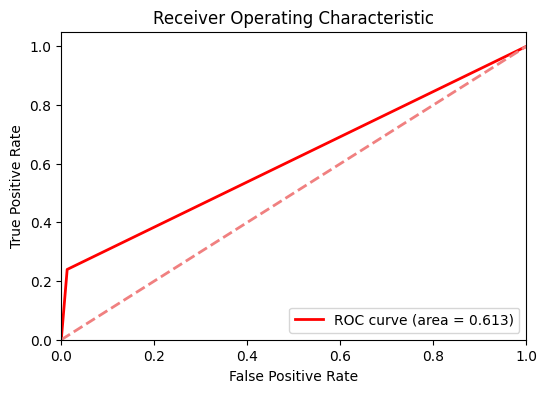

In [67]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(gaussian_nb, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [59]:
ml.k_cross_validate(gaussian_nb,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95683453 0.95503597 0.95503597 0.96402878 0.96043165 0.94964029
 0.95683453 0.96582734 0.96043165 0.96043165]

Mean accuracy score:  0.9584532374100719

Standard deviation:  0.0045107684186994545


In [60]:
ml.k_cross_validate(gaussian_nb_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95683453 0.95503597 0.95503597 0.96402878 0.96043165 0.94964029
 0.95683453 0.96582734 0.96043165 0.96043165]

Mean accuracy score:  0.9584532374100719

Standard deviation:  0.0045107684186994545


In [61]:
ml.k_cross_validate(gaussian_nb_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95683453 0.95503597 0.95503597 0.96402878 0.96043165 0.94964029
 0.95683453 0.96582734 0.96043165 0.96043165]

Mean accuracy score:  0.9584532374100719

Standard deviation:  0.0045107684186994545


In [62]:
ml.k_cross_validate(gaussian_nb_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.95323741 0.95683453 0.95863309 0.96942446 0.96043165 0.94964029
 0.95683453 0.9676259  0.96223022 0.96402878]

Mean accuracy score:  0.9598920863309353

Standard deviation:  0.005858452329101553


### Stratified K-fold

In [63]:
ml.stratified_k_cross_validate(gaussian_nb,X,y,n_splits=10)


Average Accuracy: 0.9580935251798561

Average Precision: 0.48252443377056375

Average Recall: 0.3231225296442687

Average F1-Score: 0.3828465434113701


In [64]:
ml.stratified_k_cross_validate(gaussian_nb_grid,X,y,n_splits=10)


Average Accuracy: 0.9580935251798561

Average Precision: 0.48252443377056375

Average Recall: 0.3231225296442687

Average F1-Score: 0.3828465434113701


In [65]:
ml.stratified_k_cross_validate(gaussian_nb_rand,X,y,n_splits=10)


Average Accuracy: 0.9580935251798561

Average Precision: 0.48252443377056375

Average Recall: 0.3231225296442687

Average F1-Score: 0.3828465434113701


In [66]:
ml.stratified_k_cross_validate(gaussian_nb_opt,X,y,n_splits=10)


Average Accuracy: 0.9598920863309355

Average Precision: 0.524650765900766

Average Recall: 0.29624505928853756

Average F1-Score: 0.37253774098975334


### Save Model

In [68]:
final_gaussian_estimator = gaussian_nb

In [69]:
# Saving the model

ml.save_model(final_gaussian_estimator, "../Models/Weak kidneys/GaussianNB.pkl")

Saved Model


## Prediction

In [73]:
# Predicting on perturbed values

sc = ml.np.random.rand()

ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[0], y_test.iloc[0], sc)

Instance:
 [ 0.         -0.68801717 -0.92913778 -0.06414882 -1.6627907 ]

Expected Class:  0

 Modified Instance:
 [ 0.         -0.76126994 -0.96000395 -0.05207264 -1.7918556 ]

Predicted Class:  [0]


In [74]:
ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[3], y_test.iloc[3], sc)

Instance:
 [ 1.          0.78780433  1.60528875 -0.06414882  0.58857467]

Expected Class:  0

 Modified Instance:
 [ 1.          0.6541118   1.71988604 -0.11063376  0.60144399]

Predicted Class:  [0]


In [75]:
ml.predict_on_modified_instance(final_gaussian_estimator, X_test.iloc[34], y_test.iloc[34], sc)

Instance:
 [ 1.          3.46273081  0.19727401 -0.06414882  2.56208769]

Expected Class:  1

 Modified Instance:
 [ 1.          3.52489337  0.21547659 -0.10115756  2.58980243]

Predicted Class:  [1]
